In [19]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import folium
from folium import Map
from folium.plugins import HeatMap

In [20]:
import matplotlib.font_manager as fm
[font for font in fm.fontManager.ttflist if 'Malgun Gothic' in font.name]

[<Font 'Malgun Gothic' (malgun.ttf) normal normal 400 normal>,
 <Font 'Malgun Gothic' (malgunbd.ttf) normal normal bold normal>]

In [21]:
plt.rcParams['font.family'] = 'Malgun Gothic'

In [22]:
df = pd.read_csv('./child-house.csv', encoding='euc-kr', low_memory=False)

df.columns

Index(['어린이집명', '시도명', '시군구명', '어린이집유형구분', '정원수', '보육교직원수', '소재지도로명주소',
       '어린이집전화번호', '어린이집팩스번호', '보육실수', '놀이터수', 'CCTV설치수', '통학차량운영여부', '홈페이지주소',
       '데이터기준일자', '제공기관코드', '제공기관명', 'Unnamed: 17'],
      dtype='object')

In [23]:
df.shape

(48178, 18)

In [24]:
df.head()

,어린이집명,시도명,시군구명,어린이집유형구분,정원수,보육교직원수,소재지도로명주소,어린이집전화번호,어린이집팩스번호,보육실수,놀이터수,CCTV설치수,통학차량운영여부,홈페이지주소,데이터기준일자,제공기관코드,제공기관명,Unnamed: 17
0,노아키즈어린이집,강원도,원주시,가정,20,5.0,"강원도 원주시 시청로 496-1 101동 102호(관설동, 코아루아파트)",033-742-1295,NaN,0.0,0.0,0.0,,NaN,2018-07-31,6420000,강원도,NaN
1,놀러와어린이집,강원도,원주시,가정,20,4.0,"강원도 원주시 봉화로 231 210동 103호 (우산동, 한라비발디2차아파트)",033-764-7600,NaN,0.0,0.0,0.0,,NaN,2018-07-31,6420000,강원도,NaN
2,꿈꾸는 어린이집,강원도,강릉시,가정,10,2.0,"강원도 강릉시 성덕포남로 89-17 503동 106호(입암동, 입암5주공아파트)",033-651-1555,NaN,2.0,0.0,3.0,N,NaN,2018-07-31,6420000,강원도,NaN
3,꿈꾸미 어린이집,강원도,강릉시,가정,18,4.0,강원도 강릉시 경강로2301번길 22 강릉7차아파트 A동 106호 (포남동),070-4098-4292,NaN,3.0,0.0,0.0,N,NaN,2018-07-31,6420000,강원도,NaN
4,꼬마대통령어린이집,강원도,동해시,가정,20,4.0,강원도 동해시 평원로 107 엘리시아 아파트 105동104호,033-533-5866,NaN,3.0,0.0,4.0,Y,NaN,2018-07-31,6420000,강원도,NaN


In [25]:
df.isnull().sum()

어린이집명              0
시도명                0
시군구명               0
어린이집유형구분           0
정원수                0
보육교직원수           241
소재지도로명주소        4253
어린이집전화번호           0
어린이집팩스번호       24549
보육실수           12066
놀이터수           14994
CCTV설치수         9526
통학차량운영여부        3916
홈페이지주소         41483
데이터기준일자            0
제공기관코드             0
제공기관명              0
Unnamed: 17    48178
dtype: int64

In [26]:
simple_df = df.drop(columns=[
    '어린이집전화번호', '어린이집팩스번호',
    '보육실수', '놀이터수', 'CCTV설치수', '통학차량운영여부', '홈페이지주소',
    '데이터기준일자', '제공기관코드', '제공기관명', 'Unnamed: 17'
])

simple_df.head()

,어린이집명,시도명,시군구명,어린이집유형구분,정원수,보육교직원수,소재지도로명주소
0,노아키즈어린이집,강원도,원주시,가정,20,5.0,"강원도 원주시 시청로 496-1 101동 102호(관설동, 코아루아파트)"
1,놀러와어린이집,강원도,원주시,가정,20,4.0,"강원도 원주시 봉화로 231 210동 103호 (우산동, 한라비발디2차아파트)"
2,꿈꾸는 어린이집,강원도,강릉시,가정,10,2.0,"강원도 강릉시 성덕포남로 89-17 503동 106호(입암동, 입암5주공아파트)"
3,꿈꾸미 어린이집,강원도,강릉시,가정,18,4.0,강원도 강릉시 경강로2301번길 22 강릉7차아파트 A동 106호 (포남동)
4,꼬마대통령어린이집,강원도,동해시,가정,20,4.0,강원도 동해시 평원로 107 엘리시아 아파트 105동104호


In [27]:
data = simple_df['어린이집유형구분'].value_counts()

pd.DataFrame(data)

,어린이집유형구분
가정,22206
민간,17058
국공립,4168
사회복지법인,2235
직장,1335
법인·단체,995
협동,181


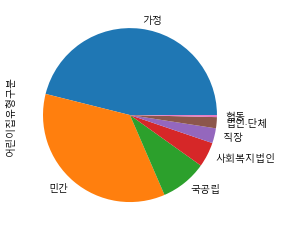

In [28]:
data = simple_df['어린이집유형구분'].value_counts()

data.plot.pie()

plt.show()

In [29]:
data = simple_df['시도명'].value_counts()

pd.DataFrame(data)

,시도명
경기도,9350
경상남도,5564
서울특별시,4717
충청남도,3702
광주광역시,3515
경상북도,3355
대구광역시,2656
전라북도,2593
강원도,2254
인천광역시,2102


In [30]:
data = simple_df['시군구명'].value_counts().nlargest(20)

pd.DataFrame(data)

,시군구명
북구,2062
서구,1847
천안시,1348
광산구,1281
수원시,1136
김해시,1122
남구,1121
구미시,960
동구,934
아산시,852


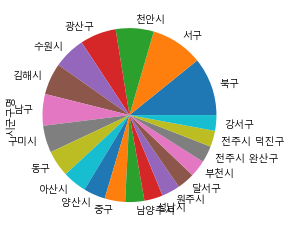

In [31]:
data = simple_df['시군구명'].value_counts().nlargest(20)

data.plot.pie()

plt.show()

In [32]:
address_df = simple_df[pd.notnull(simple_df['소재지도로명주소'])]

simple_df.shape, address_df.shape

((48178, 7), (43925, 7))

In [33]:
address_df['소재지도로명주소'][0]

'강원도 원주시 시청로 496-1 101동 102호(관설동, 코아루아파트)'

In [34]:
from geocoder import geocode

geocode('강원도 원주시 시청로 496-1 101동 102호(관설동, 코아루아파트)')

(37.31397292792154, 127.96216997926722)

In [35]:
sample_df = address_df.sample(n=300, random_state=1)

lats = []
lngs = []

for i, index in enumerate(sample_df.index):
    print(i + 1, '-', index)
    lat, lng = geocode(df['소재지도로명주소'][index])
    lats.append(lat)
    lngs.append(lng)

sample_df = sample_df.assign(lat=lats, lng=lngs)

sample_df.head()

1 - 4873
2 - 1807
3 - 15418
4 - 40041
5 - 44475
6 - 12576
7 - 8895
8 - 33544
9 - 37626
10 - 45429
11 - 26269
12 - 40724
13 - 31265
14 - 14035
15 - 4499
16 - 2996
17 - 21670
18 - 3197
19 - 23936
20 - 7318
21 - 38792
22 - 18841
23 - 43518
24 - 10567
25 - 27976
26 - 21040
27 - 19929
28 - 45558
29 - 11720
30 - 21106
31 - 12484
32 - 13245
33 - 31702
34 - 5676
35 - 47534
36 - 35753
37 - 14545
38 - 27917
39 - 27820
40 - 4924
41 - 13106
42 - 32827
43 - 17990
44 - 34898
45 - 45172
46 - 44972
47 - 34257
48 - 6278
49 - 37947
50 - 20453
51 - 40476
52 - 13168
53 - 32597
54 - 8636
55 - 12218
56 - 17197
57 - 6174
58 - 27812
59 - 33551
60 - 45163
61 - 23868
62 - 16293
63 - 36978
64 - 9562
65 - 29246
66 - 40143
67 - 15084
68 - 7597
69 - 27794
70 - 4323
71 - 35049
72 - 3602
73 - 31319
74 - 23911
75 - 2736
76 - 44582
77 - 12522
78 - 391
79 - 14102
80 - 31316
81 - 5151
82 - 26240
83 - 19166
84 - 2632
85 - 11343
86 - 39637
87 - 44250
88 - 15862
89 - 23910
90 - 10981
91 - 32556
92 - 23755
93 - 23558
94 - 27

,어린이집명,시도명,시군구명,어린이집유형구분,정원수,보육교직원수,소재지도로명주소,lat,lng
4873,소망어린이집,경상남도,통영시,가정,19,6.0,"경상남도 통영시 미수해안로 38 102동 102호(미수동,일성유수안아파트)",34.829418,128.408686
1807,동화속아이들어린이집,서울특별시,종로구,국공립,65,12.0,서울특별시 종로구 통일로 246-11 무악현대아파트 단지내,37.575413,126.958848
15418,해태어린이집,서울특별시,영등포구,국공립,165,24.0,서울특별시 영등포구 가마산로 316 (대림동),37.498038,126.894820
40041,샘터사랑어린이집,경기도,부천시,민간,37,7.0,경기도 부천시 원종로119번길 76-3,37.527523,126.813605
44475,대치도담 어린이집,서울특별시,강남구,국공립,68,NaN,서울특별시 강남구 선릉로64길 33 도곡초등학교(대치4동),37.499060,127.054671


In [36]:
map = Map(location=[36.5, 127.5], zoom_start=7)

data = sample_df[['lat', 'lng']].groupby(['lat', 'lng']).sum().reset_index().values.tolist()

HeatMap(data=data, radius=20).add_to(map)

for lat, lng in data:
    marker = folium.Circle(
        location=[lat, lng],
        radius=500,
        weight=1,
        fill_color='#F00',
        fill_opacity=0.3,
    )
    marker.add_to(map)

map
